In [ ]:
# Student name: Benjamin Rabishaw
# Student number: 1001556522
# Instructor: Shion Guha
# Course code: INF2178
# Course name: Experimental Design for Data Science
# Program: Master of Information
# Faculty of Information
# University of Toronto


# Technical Assignment 4
# April 5, 2024

In [44]:
# Initiating relevant libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import anderson
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.power import TTestIndPower
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
from statsmodels.stats.diagnostic import het_white
import holoviews as hv

In [3]:
# Integrating Google Drive

from google.colab import drive
drive.mount('/drive', force_remount=True)

Mounted at /drive


In [20]:
# Loading Dataset and surveying first rows

df = pd.read_csv('/drive/MyDrive/UofT/Colab/Files/INF2178_A4_data.csv')
df.head(25)

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
5,6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
6,7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
7,8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
8,10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
9,13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,2.0,30.0,0.0,1272,0.698,1.380


In [8]:
# Displaying total length of dataframe

len(df)

294

In [10]:
# Surveying columns

df.columns

Index(['Unnamed: 0', 'Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay',
       'M/F', 'Hand', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF'],
      dtype='object')

In [9]:
# Surveying column data types

df.dtypes

Unnamed: 0      int64
Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object

In [21]:
# Data Cleaning

## Removing handedness column
dfc = df.drop(columns=['Hand'])

## Removing rows without SES data
dfc = df.dropna(subset=['SES'])

## Renaming Unnamed: 0 and assigning it as the index
dfc.set_index('Unnamed: 0', inplace=True)
dfc.index.name = 'Index'

dfc.head(25)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Index,,,,,,,,,,,,,,,
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,2.0,30.0,0.0,1272,0.698,1.380
14,OAS2_0008,OAS2_0008_MR2,Nondemented,2,742,F,R,95,14,2.0,29.0,0.0,1257,0.703,1.396
15,OAS2_0009,OAS2_0009_MR1,Demented,1,0,M,R,68,12,2.0,27.0,0.5,1457,0.806,1.205


In [70]:
# Surveying length of cleaned dataset and number of unique subjects

print(len(dfc))
print(dfc['Subject ID'].nunique())

279
142


In [59]:
# Power Analysis Calculation

## Calculating necessary sample size
effect_size = 0.7
alpha = 0.05
power = 0.91
obj = TTestIndPower()
sample_size = obj.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')

## Displaying result
print("The necessary sample size is at least", round(sample_size, 2))

The necessary sample size is at least 45.45


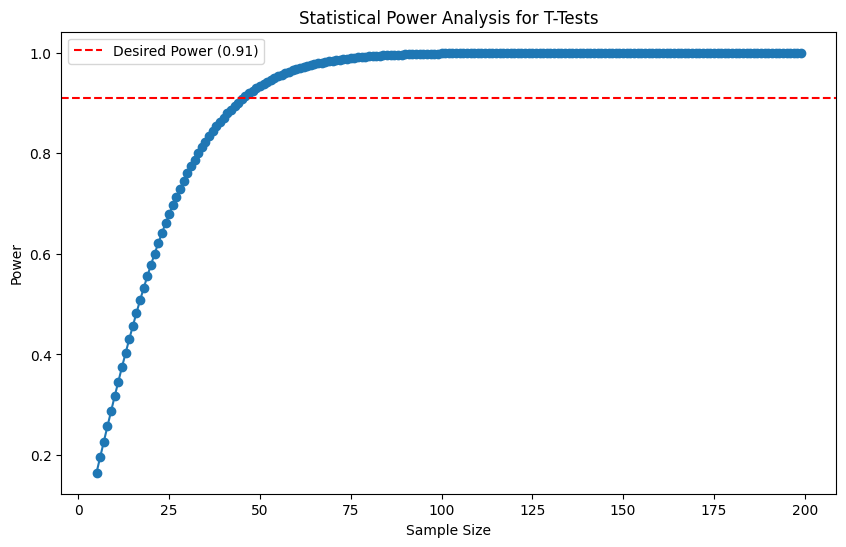

In [64]:
# Power Analysis Curve

## Plotting Power Analysis Curve

plt.figure(figsize=(10, 6))
sample_sizes = np.arange(5, 200)
power_curve = obj.power(effect_size=effect_size, nobs1=sample_sizes, alpha=alpha, alternative='two-sided')

plt.plot(sample_sizes, power_curve, marker='o', linestyle='-')
plt.title('Statistical Power Analysis for T-Tests')
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.axhline(y=power, color='r', linestyle='--', label=f'Desired Power ({power})')
plt.legend()
plt.grid(False)

## Displaying curve
plt.show()

<ipython-input-28-df6e7d7d4f83>:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.boxplot(x='SES', y='MMSE', hue='Group', data=dfc, palette=accessibilitypalette)


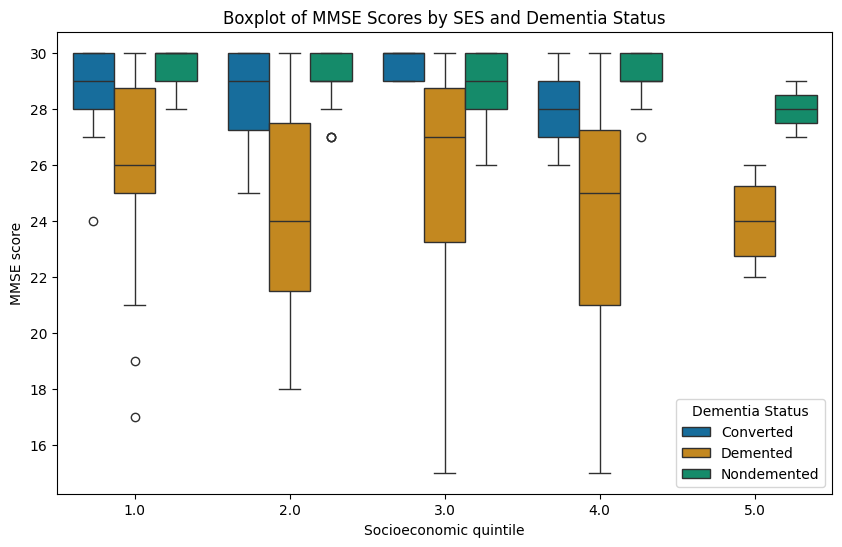

In [28]:
# Exploratory Data Analysis

## Boxplot of MMSE, SES, and Dementia status
accessibilitypalette = sns.color_palette("colorblind") ### Creating colour-blindness-accessible hues
plt.figure(figsize=(10, 6))
sns.boxplot(x='SES', y='MMSE', hue='Group', data=dfc, palette=accessibilitypalette)
plt.title('Boxplot of MMSE Scores by SES and Dementia Status')
plt.xlabel('Socioeconomic quintile')
plt.ylabel('MMSE score')
plt.legend(title='Dementia Status')
plt.show()

In [89]:
# Testing ANOVA Assumption 1 for RQ1:

## Fiting the mixed-effects ANOVA model
model = sm.MixedLM.from_formula('MMSE ~ SES + Group', data=dfc, groups=dfc['Subject ID'])
result = model.fit()
residuals = result.resid

## Performing Shapiro-Wilk test for normality of residuals
shapiro_statistic, shapiro_p_value = shapiro(residuals)

print("Shapiro-Wilk Test Statistic for dfc:", shapiro_statistic)
print("p-value:", shapiro_p_value)
print()

## Transforming the MMSE data using the Box-Cox method
bcMMSE, lambda_value = stats.boxcox(dfc['MMSE'])

## Adding the transformed TOTSPACE data as a column in the main dataframe for later use
dfc['bcMMSE'] = bcMMSE

## Re-making model and re-running Shapiro-Wilk test
model2 = sm.MixedLM.from_formula('bcMMSE ~ SES + Group', data=dfc, groups=dfc['Subject ID'])
result2 = model2.fit()
residuals2 = result2.resid

shapiro_statistic2, shapiro_p_value2 = shapiro(residuals2)

print("Shapiro-Wilk Test Statistic for transformed data:", shapiro_statistic2)
print("p-value for transformed data:", shapiro_p_value2)

Shapiro-Wilk Test Statistic for dfc: 0.9126453995704651
p-value: 1.125546964658719e-11



<ipython-input-89-6f4f6f246913>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['bcMMSE'] = bcMMSE


Shapiro-Wilk Test Statistic for transformed data: 0.9799034595489502
p-value for transformed data: 0.0005738740437664092


In [91]:
# Testing ANOVA assumption 2 for RQ1

## Performing the initial Brown-Forsythe test
bf_test_statistic, bf_p_value = levene(*[group['bcMMSE'] for _, group in dfc.groupby('Group')], center='median')
print("Brown-Forsythe Test Statistic:", bf_test_statistic)
print("p-value:", bf_p_value)
print()

## Transforming the bcMMSE values further by taking their square root
sqrt_bcMMSE = np.sqrt(dfc['bcMMSE'])
dfc['sqrt_bcMMSE'] = sqrt_bcMMSE

# Performing Brown-Forsythe test again on the additionally transformed data
bf_test_statistic, bf_p_value = levene(*[group['sqrt_bcMMSE'] for _, group in dfc.groupby('Group')], center='median')

print("Brown-Forsythe Test Statistic for transformed data:", bf_test_statistic)
print("p-value for transformed data:", bf_p_value)


Brown-Forsythe Test Statistic: 20.47566988848214
p-value: 5.1106441428235466e-09

Brown-Forsythe Test Statistic for transformed data: 62.269024163587936
p-value for transformed data: 4.793051032226375e-23


<ipython-input-91-c1bb30f9cd59>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['sqrt_bcMMSE'] = sqrt_bcMMSE


In [92]:
# Performing the mixed-effects ANOVA for RQ1

## Fitting the mixed-effects ANOVA model
model = sm.MixedLM.from_formula('MMSE ~ Group + SES', data=dfc, groups=dfc['Subject ID'])
result = model.fit()

## Printing results
print(result.summary())


             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   MMSE     
No. Observations:     279       Method:               REML     
No. Groups:           142       Scale:                2.6316   
Min. group size:      1         Log-Likelihood:       -633.1844
Max. group size:      2         Converged:            Yes      
Mean group size:      2.0                                      
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept            29.246    0.734 39.839 0.000 27.807 30.685
Group[T.Demented]    -3.869    0.743 -5.206 0.000 -5.326 -2.412
Group[T.Nondemented]  0.536    0.716  0.749 0.454 -0.867  1.940
SES                  -0.259    0.185 -1.403 0.161 -0.621  0.103
Group Var             4.433    0.605                           



In [93]:
# Performing mixed-effects ANOVA for RQ2

## Fitting the mixed-effects ANOVA model
model = sm.MixedLM.from_formula('MMSE ~ SES * Visit', data=dfc, groups=dfc['Subject ID'])
result = model.fit()

## Printing results
print(result.summary())


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: MMSE     
No. Observations: 279     Method:             REML     
No. Groups:       142     Scale:              2.4780   
Min. group size:  1       Log-Likelihood:     -670.0340
Max. group size:  2       Converged:          Yes      
Mean group size:  2.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    28.824    0.942 30.592 0.000 26.977 30.670
SES          -0.248    0.345 -0.721 0.471 -0.924  0.427
Visit        -0.004    0.460 -0.009 0.993 -0.906  0.898
SES:Visit    -0.230    0.168 -1.366 0.172 -0.560  0.100
Group Var     8.790    1.086                           



Number of NaN under the SES column: 15
